# Semi-avansert pandas
Vi har nå vært igjennom basics med pandas. Det er veldig mye du kan gjøre med pandas, og vi kan ikke dekke alt i dette kurset

## Vi gir en liten innføring i:
* Multiindex/Multicolumn dataframes
* Filtrering
* Omforme med `.melt()`, `.pivot()`
* ...

# Multiindex dataframes
* Multiindex har «tupler» som index: `[(Alta, 1991), (Alta, 1992), .... , (Ålesund, 1991), (Ålesund,  1992)]`
* Vi kan lage en slik multiindex med feks `.set_index(["Sted", "År"])`
* Vi slår nå opp i dataframe med tupler, `df.loc[("Molde", 2001), "Fraflytning"]`
* Vi kan også slå opp i kun ytterste index, `df.loc["Molde"]`

In [1]:
import pandas as pd
df = pd.read_csv("eu_GDP.csv") # teina010 dataset fra eurostat, (GDP and main components (output, expenditure and income))
 #Områder som er med
 #Gjør om til pandas.Period i stedet for "strenger"
 #Setter multiindex - område ytterst, år innerst

 #Slår opp i spesifikt datapunkt
 #Henter data for Norge

GDP (tusen euro), Norge 1. kvartal 2023 120455.4


## Slice og hente områder med data
* Dersom vi vil hente ut data litt mer komplisert enn kun fra ytterste indeks bør vi først sortere indeksen
* Det gjøres med `df.sort_index(level=...)`
* Her er `level`et heltall, eller etikette eller en liste av heltall/etiketter som forteller hvilken nivå vi skal sortere på
* Vi teller "nivåene" fra innerst=0 til ytterst=n-1, (1 dersom vi har 2 nivå)

In [2]:
 # Sortere på land
 # Sorterer år
 #Sorterer begge


### Slice
* Det blir litt mer komplisert når man skal slice multiindex dataframes
* Mitt tips er å bruke `df.xs(key, axis=0, level=None, drop_level=True)` ("cross section") når man skal hente ut hele nivåer
* Og `pd.IndexSlice` for mer komplisert slicing
* *Også kolonnene kan ha en "multiindex" Vi bruker da de samme teknikkene*

In [3]:
 # Hent ut data for 3. kvartal 2021, for alle land

,,value
Geopolitical entity (reporting),Time,
Austria,2021Q3,105003.0
Belgium,2021Q3,128937.0
Bulgaria,2021Q3,18276.2
Croatia,2021Q3,14796.3
Cyprus,2021Q3,6460.0
Czechia,2021Q3,63002.6
Denmark,2021Q3,87208.0
Estonia,2021Q3,7959.7
"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",2021Q3,3187247.2


#### pd.IndexSlice
* IndexSlice er spesialbygget for å slice over multiindekser
* Det finnes flere måter å gjøre dette på, men de er litt rare og vanskelige
* Med `IndexSlice` lager vi først en "slicer": `idx = pd.IndexSlice`
* Denne bruker vi sammen med `.loc[]` til å slice ganske intuitivt over flere indeksnivåer, (funker også lang kolonnene)
* `data = df.loc[idx["Alta":"Molde", 1950:1970], :]`

In [6]:
idx = pd.IndexSlice
 # Slice: Land fra tyskland til sverige mellom 2022Q1 til 2023Q3

value
Geopolitical entity (reporting) Time             
Germany                         2022Q1   962521.0
                                2022Q2   979029.0
                                2022Q3   993638.0
                                2022Q4  1012073.0
                                2023Q1  1029719.0
...                                           ...
Sweden                          2022Q3   139331.2
                                2022Q4   137742.5
                                2023Q1   136965.7
                                2023Q2   134285.4
                                2023Q3   132872.4

[147 rows x 1 columns]

## Filtrering
* Ofte holder det ikke å slice data -- vi trenger å filtrere de ut
* Kanskje vi vil velge ut data for land med befolkning større enn 10 millioner *OG* BNP større enn ...
* I pandas kan vi filtrere i `.loc[..]` ved bruk av boolsk aritmetikk
* Vi kan også bruke `.query("spørring")`

## Boolsk filtrering
* Gjør vi noe som `df["alder"] > 25` returnerer pandas en dataserie med `True`overalt hvor "alder" er større enn 25
* Vi kan bruke denne dataserien til å slå opp i alle radene hvor serien inneholder true:

  ```python
  df.loc[df["alder"] > 25] # Returnerer alle rader hvor "alder" kolonnen inneholder et tall over 25
  ```
* Vi kan kombinere ulike boolske serier med `&` ( and ) og `|` (eller) 

Tabell med ulike måter å bruke dette til å filtrere ut data:
| Beskrivelse                                                 | Eksempel                                           |
|-------------------------------------------------------------|----------------------------------------------------|
| Filter rader der `Alder` er større enn 20                   | `df[df['Alder'] > 20]`                             |
| Filter rader der `Navn` inneholder 'e' (case-insensitive)   | `df[df['Navn'].str.contains('e', case=False)]`     |
| Filter rader der `Alder` er mellom 20 og 30                 | `df[(df['Alder'] >= 20) & (df['Alder'] <= 30)]`    |
| Filter rader der `Navn` ikke inneholder 'a'                 | `df[~df['Navn'].str.contains('a', case=False)]`    |
| Filter rader der `Poeng` er større enn 50 eller `Alder` er mindre enn 25 | `df[(df['Poeng'] > 50) \| (df['Alder'] < 25)]` |
| Filter rader der `Land` er enten "Norge" eller "Sverige"    | `df[df['Land'].isin(['Norge', 'Sverige'])]`        |
| Filter rader med eksakte match i `Postnummer`               | `df[df['Postnummer'].isin([1234, 5678])]`          |
| Filter rader der `Navn` starter med 'B'                     | `df[df['Navn'].str.startswith('B')]`               |
| Filter rader der `Navn` slutter på 'e'                      | `df[df['Navn'].str.endswith('e')]`                 |


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("folketall.csv", encoding="ISO-8859-1", sep="\t")

# Bytt ut ".." med nan

#Gjør om data bortsett fra region til heltall
kolonner = list(df.columns)
kolonner.remove("region")
konvertering = {kol: "Int64" for kol in kolonner}
df = df.astype(konvertering)

#Gjør om år til periodindex
df["år"] = pd.PeriodIndex(df["år"], freq="Y")

#Sorter index
df= df.set_index(["region", "år"])
df = df.sort_index(level=["region", "år"])

#litt slicing
idx = pd.IndexSlice
df.xs("1990", level="år") # Cross section 
#indexslice (alle regioner, 2000 til 2023 ,døde til innflyttinger

 # Slå opp alle år hvor færre enn 1000 døde (alle regioner)

 #Slå opp alle rader hvor flere flyttet inn enn ut

# Alle region/år hvor nettoinnflytting er positiv og befolkning er større enn 100,000

#Dersom man vil filtrere på index, kan man resette den med .reset_index() eller:

#Finn kommune-funksjon


#Slice med funksjon fra molde til halden, 1990 døde og levendefødte
df.loc[idx[FK("Molde"):FK("Halden"), "1990"], ["Døde", "Levendefødte"]]
                            

Døde  Fødselsoverskudd  Innflyttinger
region                            år                                         
K_0301 Oslo                       2000  5270              2594          31585
                                  2001  5348              2386          33140
                                  2002  5270              2541          32055
                                  2003  4994              3264          30782
                                  2004  4854              3809          32674
...                                      ...               ...            ...
K_Rest Delte kommuner og uoppgitt 2020     0                 0              0
                                  2021     0                 0              0
                                  2022     0                 0              0
                                  2023     0                 0              0
                                  2024     0                 0              0

[9025 rows x 3 columns]

Befolkning 1. januar  Levendefødte  \
region                            år                                         
K_0301 Oslo                       1951                434365          5713   
                                  1952                437184          5652   
                                  1953                440674          5847   
                                  1954                444041          5878   
                                  1955                447064          5910   
...                                                      ...           ...   
K_Rest Delte kommuner og uoppgitt 2012                 53138           523   
                                  2013                 53371           529   
                                  2014                 53757           530   
                                  2016                 54014           545   
                                  2018                 53892           475   

                                        Døde  Fødselsoverskudd  Innflyttinger  \
region                            år                                            
K_0301 Oslo                       1951  3794              1919          14769   
                                  1952  4010              1642          14268   
                                  1953  3996              1851          16070   
                                  1954  3932              1946          15220   
                                  1955  4132              1778          15620   
...                                      ...               ...            ...   
K_Rest Delte kommuner og uoppgitt 2012   634              -111           2686   
                                  2013   528                 1           2750   
                                  2014   530                 0           2742   
                                  2016   550                -5           2667   
                                  2018   528               -53           2518   

                                        Utflyttinger  Nettoinnflytting  \
region                            år                                     
K_0301 Oslo                       1951         13869               900   
                                  1952         12420              1848   
                                  1953         14554              1516   
                                  1954         14143              1077   
                                  1955         14670               950   
...                                              ...               ...   
K_Rest Delte kommuner og uoppgitt 2012          2343               343   
                                  2013          2354               396   
                                  2014          2428               314   
                                  2016          2535               132   
                                  2018          2410               108   

                                        Folketilvekst  
region                            år                   
K_0301 Oslo                       1951           2819  
                                  1952           3490  
                                  1953           3367  
                                  1954           3023  
                                  1955           4183  
...                                               ...  
K_Rest Delte kommuner og uoppgitt 2012            233  
                                  2013            386  
                                  2014            311  
                                  2016            127  
                                  2018             59  

[12086 rows x 8 columns]

,,Døde,Levendefødte
region,år,,
K_1506 Molde,1990,245,388
K_1508 Ålesund,1990,446,634
K_1511 Vanylven,1990,40,46
K_1514 Sande,1990,41,38
K_1515 Herøy (Møre og Romsdal),1990,78,107
...,...,...,...
K_1875 Hábmer - Hamarøy,1990,0,0
K_21-22 Svalbard og Jan Mayen,1990,0,0
K_23 Kontinentalsokkelen,1990,0,0


### Filtrere med `.query("streng")`
* Filtrering med query er veldig likt -- bare litt mer lesbart
* Vi gir like gjerne bare en tabell:
| Beskrivelse                                                 | Eksempel                                           |
|-------------------------------------------------------------|----------------------------------------------------|
| Filter rader der `Alder` er større enn 20                   | `df.query("Alder > 20")`                           |
| Filter rader der `Navn` er "Ola"                            | `df.query("Navn == 'Ola'")`                        |
| Filter rader der `Alder` er mellom 20 og 30                 | `df.query("20 <= Alder <= 30")`                    |
| Filter rader der `Poeng` er større enn 50 eller `Alder` er mindre enn 25 | `df.query("Poeng > 50 or Alder < 25")` |
| Filter rader der `Land` er enten "Norge" eller "Sverige"    | `df.query("Land in ['Norge', 'Sverige']")`         |
| Filter rader der `Navn` ikke er "Ola"                       | `df.query("Navn != 'Ola'")`                        |
| Filter rader der `Alder` ganger `Poeng` er større enn 1000  | `df.query("Alder * Poeng > 1000")`                 |
| Filter rader med delvis match på `Postnummer` (tekststreng) som starter med '12' | `df.query("Postnummer.str.startswith('12')", engine='python')` |
| Filter rader der `Poeng` ikke er null                       | `df.query("Poeng.notna()", engine='python')`       |


# Melt og Pivot
* Vi trenger ofte å omforme hvordan dataene er satt sammen i rader og kolonner
* Vi kan bruke `df.melt()` til å gjøre dataframen smal og lang (kolonner ned i rader)
* Vi bruker `df.pivot()` til å gjøre dataframen bred og kort (rader opp i kolonnene)
* Ofte er det greit å første gjøre dataframe så smal som mulig uten å "miste data"
* Deretter fikse datatyper og filtrere før man bestemmer seg for indeks og kolonner

## `df.melt(...)`
Et kall til melt ser slik ut:
* `df.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)`
* id_vars, er kolonnene vi vil beholde slik de er, en liste med kolonnenavn
* value_vars er en liste med kolonnene vi vil "smelte" (ha ned som rader).
  * Dersom den er `None` antar vi at det er alle andre kolonner enn id_vars
* var_name og value_name er kolonnenavn og verdinavn til kolonnene som blir smeltet

In [172]:
df = pd.read_csv("helsepersonell.csv", encoding="ISO-8859-1", sep=";", header=1)

#
df = df.melt(id_vars=["statistikkvariabel", "fagutdanning", "alder", "kjønn"], var_name="år")
df = df.replace("..", np.nan)
df = df.query("fagutdanning == 'Sykepleier' and statistikkvariabel in ['Personer', 'Sysselsatte']")
df=df.rename(columns={"value": "antall"})
df = df.astype({"antall": "int32"})
df["år"] = pd.PeriodIndex(df["år"], freq="Y")

df

,statistikkvariabel,fagutdanning,alder,kjønn,år,antall
168,Personer,Sykepleier,Alle aldre,Kvinner,2008,95827
169,Personer,Sykepleier,Alle aldre,Menn,2008,10326
170,Personer,Sykepleier,15-39 år,Kvinner,2008,35188
171,Personer,Sykepleier,15-39 år,Menn,2008,4204
172,Personer,Sykepleier,15-66 år,Kvinner,2008,85862
...,...,...,...,...,...,...
20671,Sysselsatte,Sykepleier,15-74 år,Menn,2023,13539
20672,Sysselsatte,Sykepleier,40-54 år,Kvinner,2023,34803
20673,Sysselsatte,Sykepleier,40-54 år,Menn,2023,5223
20674,Sysselsatte,Sykepleier,55-66 år,Kvinner,2023,21089


## `df.pivot()`
Et kall til pivot ser slik ut:
* `df.pivot(columns, index=<no_default>, values=<no_default>)`
* columns: forteller hvilken kolonne vi skal bruke til å lage kolonnene i pivot-tabellen
* index: er kolonnene vi vil ha som indeks (bruker eksisterende indeks om vi ikke gir noe her)
* values: Kolonnene eller kolonnen som holder verdiene/datapunktene 


statistikkvariabel   Personer                                               \
alder              Alle aldre 15-39 år 15-66 år 15-74 år 40-54 år 55-66 år   
år   kjønn                                                                   
2008 Kvinner            95827    35188    85862    91175    34090    16584   
     Menn               10326     4204     9998    10181     4429     1365   
2009 Kvinner            98687    35742    88385    94004    34776    17867   
     Menn               10759     4213    10427    10611     4594     1620   
2010 Kvinner           100619    36188    89880    95835    34738    18954   
     Menn               11055     4180    10698    10910     4635     1883   
2011 Kvinner           102350    36306    91112    97441    34756    20050   
     Menn               11268     4081    10886    11113     4681     2124   
2012 Kvinner           105017    36783    93077    99913    35157    21137   
     Menn               11588     4058    11166    11428     4742     2366   
2013 Kvinner           107645    37132    94927   102339    35744    22051   
     Menn               11868     3982    11388    11702     4863     2543   
2014 Kvinner           110463    37549    96883   104888    36394    22940   
     Menn               12305     3958    11787    12134     5085     2744   
2015 Kvinner           113071    37905    98478   106901    36838    23735   
     Menn               12582     3867    11994    12399     5235     2892   
2016 Kvinner           115450    38492   100321   109320    37238    24591   
     Menn               12960     3936    12280    12771     5315     3029   
2017 Kvinner           118195    39302   102162   111766    37487    25373   
     Menn               13367     4014    12583    13178     5409     3160   
2018 Kvinner           119465    39776   102567   112778    37118    25673   
     Menn               13527     4020    12626    13321     5396     3210   
2019 Kvinner           124297    40661   104480   115304    37362    26457   
     Menn               14084     4217    12957    13817     5477     3263   
2020 Kvinner           127078    41551   105989   117502    37530    26908   
     Menn               14530     4412    13216    14232     5496     3308   
2021 Kvinner           130001    42475   107531   119680    37896    27160   
     Menn               15061     4655    13526    14725     5503     3368   
2022 Kvinner           132821    43433   108873   121683    38040    27400   
     Menn               15577     4876    13828    15238     5550     3402   
2023 Kvinner           135764    44660   110321   123934    38009    27652   
     Menn               16114     5129    14144    15726     5505     3510   

statistikkvariabel Sysselsatte                                               
alder               Alle aldre 15-39 år 15-66 år 15-74 år 40-54 år 55-66 år  
år   kjønn                                                                   
2008 Kvinner             77133    32141    76233    77102    31547    12545  
     Menn                 9439     3998     9387     9438     4195     1194  
2009 Kvinner             79693    32872    78724    79660    32204    13648  
     Menn                 9877     4044     9825     9875     4370     1411  
2010 Kvinner             80753    33096    79733    80720    32109    14528  
     Menn                10085     3995    10020    10083     4386     1639  
2011 Kvinner             82114    33427    81002    82067    32109    15466  
     Menn                10271     3917    10193    10268     4445     1831  
2012 Kvinner             84054    33901    82801    84002    32505    16395  
     Menn                10508     3888    10428    10503     4496     2044  
2013 Kvinner             86211    34368    84833    86161    33161    17304  
     Menn                10749     3824    10654    10741     4617     2213  
2014 Kvinner             88075    34824    86561    88018    33705    18032  
     Menn            

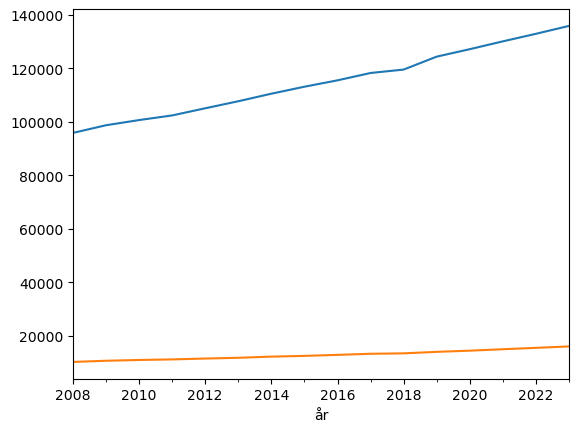

In [177]:
df = pd.read_csv("helsepersonell.csv", encoding="ISO-8859-1", sep=";", header=1)
df = df.melt(id_vars=["statistikkvariabel", "fagutdanning", "alder", "kjønn"], var_name="år")
df = df.replace("..", np.nan)
df = df.query("fagutdanning == 'Sykepleier' and statistikkvariabel in ['Personer', 'Sysselsatte']")
df=df.rename(columns={"value": "antall"})
df = df.astype({"antall": "int32"})
df["år"] = pd.PeriodIndex(df["år"], freq="Y")


df = df.pivot(index=["år", "kjønn"], columns=["statistikkvariabel", "alder"], values="antall")
df2 = df[("Personer", "Alle aldre")]
df2.xs("Kvinner", level="kjønn").plot()
df2.xs("Menn", level="kjønn").plot()
display(df)